<a href="https://colab.research.google.com/github/Puttu710/Covid19_Drug-Discovery/blob/master/covid19_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2020-05-01 10:41:07--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-05-01 10:41:07--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  81.12M   189MB/s    in 0.4s    

2020-05-01 10:41:07 (189 MB/s) - ‘Miniconda3-latest-Linux

In [0]:
!pip install git+https://github.com/samoturk/mol2vec;

  Cloning https://github.com/samoturk/mol2vec to /tmp/pip-req-build-av2ipcn6
  Running command git clone -q https://github.com/samoturk/mol2vec /tmp/pip-req-build-av2ipcn6
     |████████████████████████████████| 24.2 MB 65 kB/s 
     |████████████████████████████████| 294 kB 65.8 MB/s 
     |████████████████████████████████| 12.4 MB 58.2 MB/s 
     |████████████████████████████████| 780 kB 57.6 MB/s 
     |████████████████████████████████| 215 kB 73.6 MB/s 
     |████████████████████████████████| 103 kB 65.8 MB/s 
     |████████████████████████████████| 26.1 MB 1.4 MB/s 
     |████████████████████████████████| 88 kB 9.7 MB/s 
     |████████████████████████████████| 67 kB 7.3 MB/s 
     |████████████████████████████████| 1.1 MB 57.7 MB/s 
     |████████████████████████████████| 914 kB 62.6 MB/s 
     |████████████████████████████████| 59 kB 7.7 MB/s 
     |████████████████████████████████| 75 kB 5.6 MB/s 
     |████████████████████████████████| 351 kB 66.6 MB/s 
     |██████████████████

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sys
import os
warnings.filterwarnings("ignore")
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
def evaluation(model, X_test, y_test):
    prediction = model.predict(X_test)
    mae = mean_absolute_error(y_test, prediction)
    rmse = sqrt(mean_squared_error(y_test, prediction))
    
    plt.figure(figsize=(15, 10))
    plt.plot(prediction[:300], "red", label="prediction", linewidth=1.0)
    plt.plot(y_test[:300], 'green', label="actual", linewidth=1.0)
    plt.legend()
    plt.ylabel('Binding Affinity')
    plt.title("MAE {}, RMSE {}".format(round(mae, 4), round(rmse, 4)))
    plt.show()
    
    print('MAE score:', round(mae, 4))
    print('RMSE score:', round(rmse,4))

In [0]:
#Load the dataset and extract target values
mdf= pd.read_csv('/content/drive/My Drive/covid-19/train.csv');
target = mdf['Binding Affinity']
mdf.drop(columns='Binding Affinity',inplace=True)

In [0]:
from rdkit import Chem 
#Transforming SMILES to MOL
mdf['mol'] = mdf['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x))


In [0]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load('/content/drive/My Drive/covid-19/model_300dim.pkl')

In [0]:
from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec
print('Molecular sentence:', mol2alt_sentence(mdf['mol'][1], radius=1))
print('\nMolSentence object:', MolSentence(mol2alt_sentence(mdf['mol'][1], radius=1)))
print('\nDfVec object:',DfVec(sentences2vec(MolSentence(mol2alt_sentence(mdf['mol'][1], radius=1)), model, unseen='UNK')))

Molecular sentence: ['2246728737', '3975275337', '864674487', '903112553', '847961216', '2204949651', '2246699815', '1054767590', '864942730', '1510328189', '3217380708', '2994748777', '3218693969', '3777168895', '2041434490', '3118255683', '3218693969', '725322217', '2041434490', '3118255683', '3218693969', '3777168895']

MolSentence object: MolSentence with 22 words

DfVec object: (22, 300) dimensional vector


In [0]:
mdf['sentence'] = mdf.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)

#Extracting embeddings to a numpy.array
#Note that we always should mark unseen='UNK' in sentence2vec() so that model is taught how to handle unknown substructures
mdf['mol2vec'] = [DfVec(x) for x in sentences2vec(mdf['sentence'], model, unseen='UNK')]
X = np.array([x.vec for x in mdf['mol2vec']])
y = target.values

X.shape


(9000, 300)

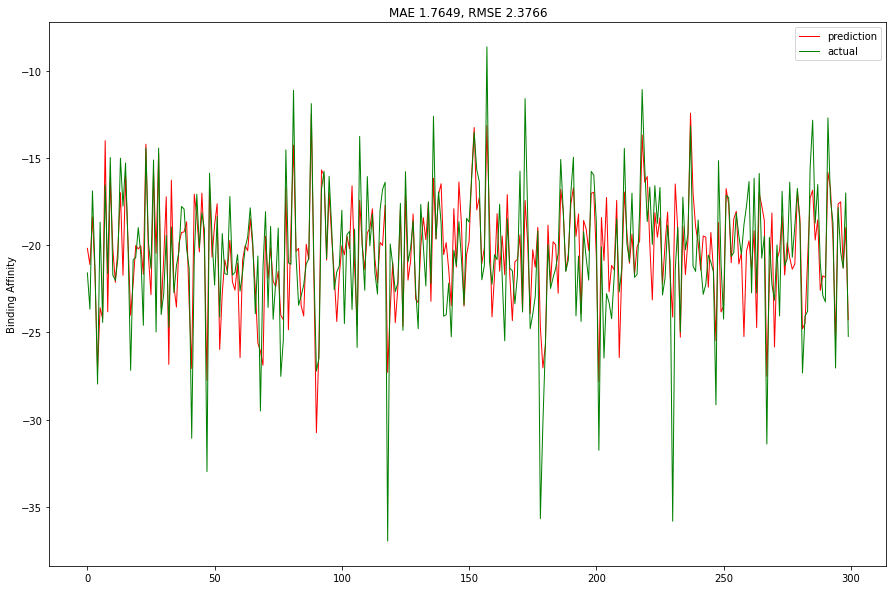

MAE score: 1.7649
RMSE score: 2.3766


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=1)
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
evaluation(ridge, X_test, y_test)

# Test dataset

In [0]:
mdf1= pd.read_csv('/content/drive/My Drive/covid-19/test.csv')
mdf1['mol'] = mdf1['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x))

In [0]:
print('Molecular sentence:', mol2alt_sentence(mdf1['mol'][1], radius=1))
print('\nMolSentence object:', MolSentence(mol2alt_sentence(mdf1['mol'][1], radius=1)))
print('\nDfVec object:',DfVec(sentences2vec(MolSentence(mol2alt_sentence(mdf1['mol'][1], radius=1)), model, unseen='UNK')))

Molecular sentence: ['864942730', '1510328189', '2246699815', '1909986973', '2245384272', '616374597', '3217380708', '4121755354', '3218693969', '951226070', '3218693969', '98513984', '3218693969', '98513984', '3218693969', '98513984', '3218693969', '951226070', '3217380708', '3772302167', '3218693969', '951226070', '3218693969', '98513984', '3218693969', '98513984', '3218693969', '3776905034', '2041434490', '1100037548']

MolSentence object: MolSentence with 30 words

DfVec object: (30, 300) dimensional vector


In [0]:
mdf1['sentence'] = mdf1.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)

In [0]:
mdf1['mol2vec'] = [DfVec(x) for x in sentences2vec(mdf1['sentence'], model, unseen='UNK')]
X = np.array([x.vec for x in mdf1['mol2vec']])

In [0]:
def evaluation1(model, X):
    prediction = model.predict(X)
    return prediction;
  
  

In [0]:
# ridge = RidgeCV(cv=5)
# ridge.fit(X_train, y_train)
predict = evaluation1(ridge, X)

In [0]:
print(predict)

[-21.708076 -19.628658 -20.6687   ... -20.319044 -17.166042 -28.743095]


In [0]:
print(type(predict))

<class 'numpy.ndarray'>


In [0]:
ans_df1 = pd.read_csv('/content/drive/My Drive/covid-19/test.csv')
ans_df1 = ans_df1['SMILES sequence']
print(ans_df1)

0           CNC(=O)N(C)c1ncccn1
1        O=C(Cc1ccccc1)c1ccccn1
2                  NC1C2CCSCC12
3        CCC(C)C(N)(CC)c1ccccc1
4        N#Cc1cccc(C2OCCC2=O)n1
                 ...           
2495      CC(N)C(C)Nc1ncccc1C#N
2496       CCCCOc1ccccc1C(=O)OC
2497              NN1CC2CCCC1C2
2498    CN1CCC(C(=O)O)c2ccccc21
2499          NCC(=O)Nc1ncncc1N
Name: SMILES sequence, Length: 2500, dtype: object


In [0]:
ans_df = pd.DataFrame(predict, columns=['Binding Affinity'])
print(ans_df)

      Binding Affinity
0           -21.708076
1           -19.628658
2           -20.668699
3           -18.260927
4           -18.472473
...                ...
2495        -25.820347
2496        -12.377977
2497        -20.319044
2498        -17.166042
2499        -28.743095

[2500 rows x 1 columns]


In [0]:
result = pd.concat([ans_df1, ans_df], axis=1, sort=False)

In [0]:
print(result)

              SMILES sequence  Binding Affinity
0         CNC(=O)N(C)c1ncccn1        -21.708076
1      O=C(Cc1ccccc1)c1ccccn1        -19.628658
2                NC1C2CCSCC12        -20.668699
3      CCC(C)C(N)(CC)c1ccccc1        -18.260927
4      N#Cc1cccc(C2OCCC2=O)n1        -18.472473
...                       ...               ...
2495    CC(N)C(C)Nc1ncccc1C#N        -25.820347
2496     CCCCOc1ccccc1C(=O)OC        -12.377977
2497            NN1CC2CCCC1C2        -20.319044
2498  CN1CCC(C(=O)O)c2ccccc21        -17.166042
2499        NCC(=O)Nc1ncncc1N        -28.743095

[2500 rows x 2 columns]


In [0]:
result.to_csv('submission.csv', index=None)